<a href="https://colab.research.google.com/github/Lilyexe/bme3053c/blob/main/file/homework-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [2]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse


    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

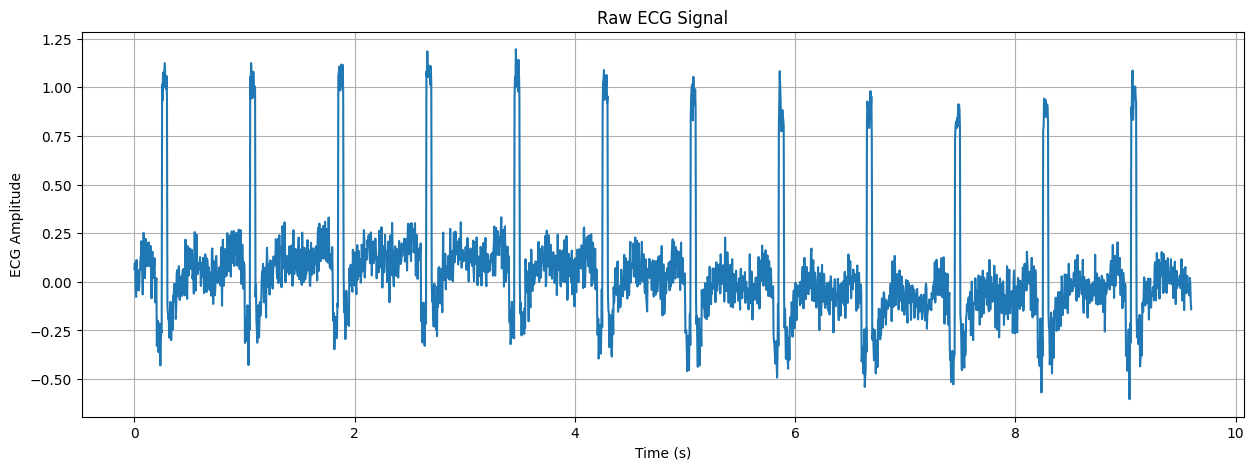

In [3]:
# Create time array
sampling_rate = 250
time = np.arange(len(ecg_data)) / sampling_rate

# Create the plot
plt.figure(figsize=(15, 5))
plt.plot(time, ecg_data)
plt.xlabel('Time (s)')
plt.ylabel('ECG Amplitude')
plt.title('Raw ECG Signal')
plt.grid(True)
plt.show()

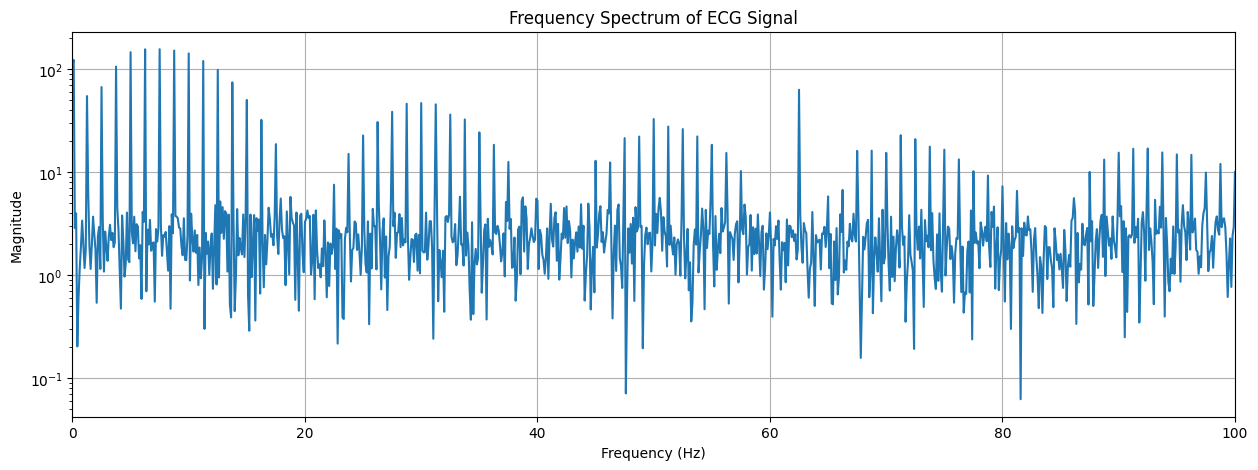

In [4]:
fft_result = fft(ecg_data)
n = len(ecg_data)

# Create frequency array
freq = np.fft.fftfreq(n, d=1/sampling_rate)

# Get positive frequencies and corresponding magnitudes
positive_freq_mask = freq >= 0
freq = freq[positive_freq_mask]
magnitude = np.abs(fft_result)[positive_freq_mask]

# Create the plot
plt.figure(figsize=(15, 5))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of ECG Signal')
plt.grid(True)

# Limit x-axis to show relevant frequencies (e.g., up to 100 Hz)
plt.xlim(0, 100)

# Use log scale for y-axis to better visualize smaller components
plt.yscale('log')
plt.show()

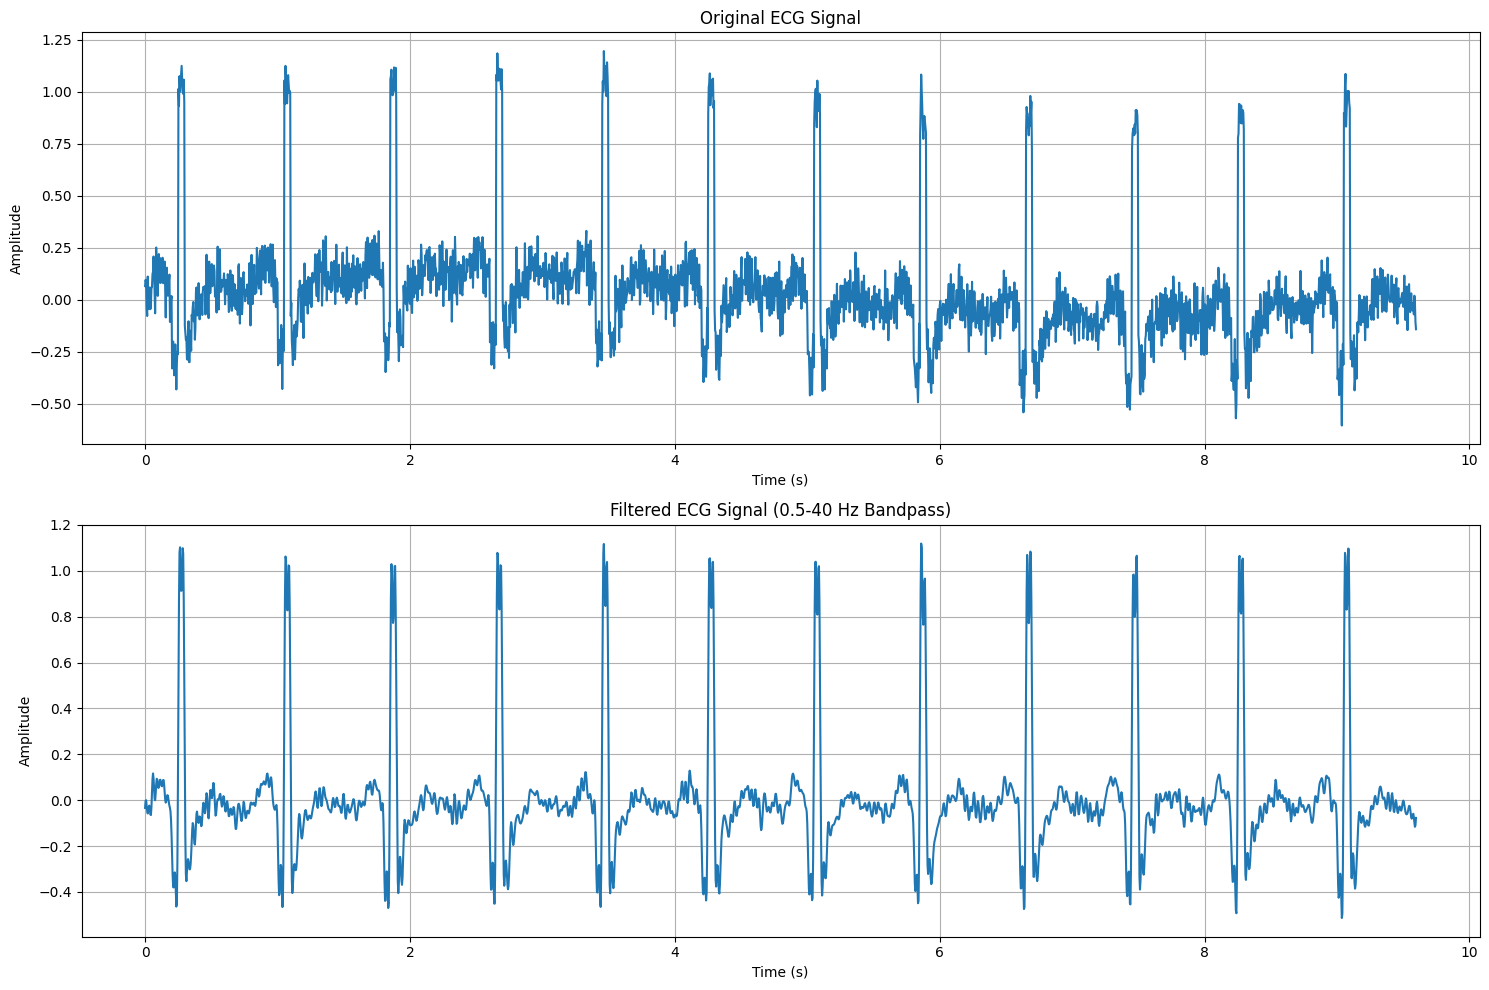

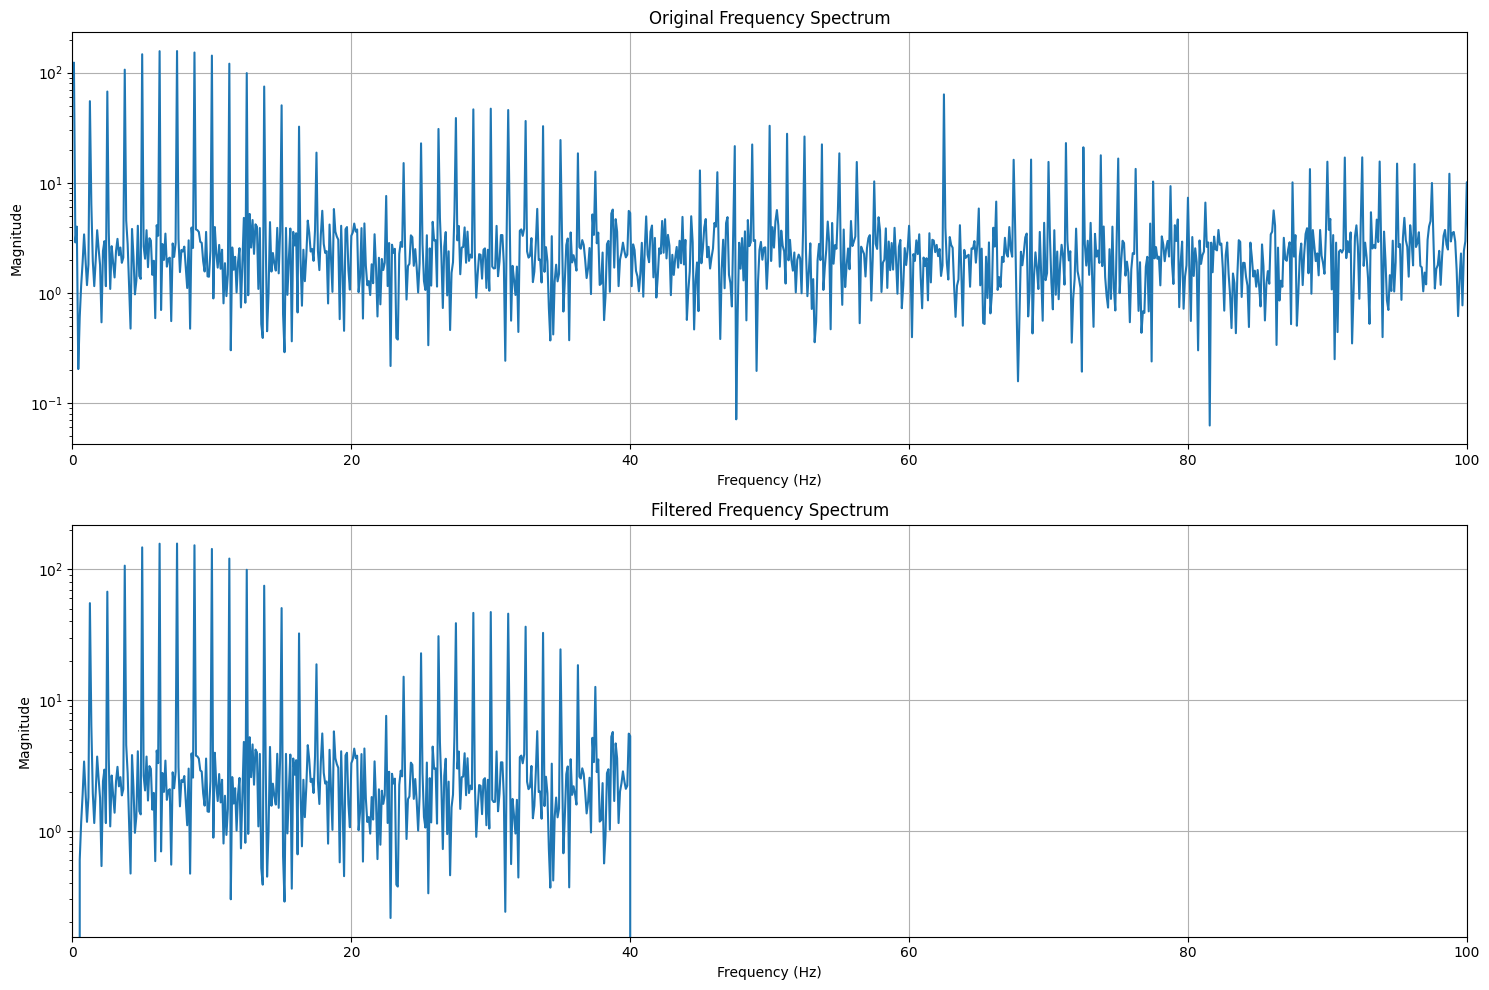

In [7]:
# Compute FFT
fft_result = fft(ecg_data)
freq = np.fft.fftfreq(len(ecg_data), d=1/sampling_rate)

# Create bandpass filter mask (0.5 Hz to 40 Hz)
low_cutoff = 0.5
high_cutoff = 40
mask = (abs(freq) >= low_cutoff) & (abs(freq) <= high_cutoff)

# Apply filter in frequency domain
filtered_fft = fft_result * mask

# Reconstruct signal using inverse FFT
filtered_ecg = np.real(ifft(filtered_fft))

# Plot original and filtered signals
plt.figure(figsize=(15, 10))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(time, ecg_data)
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Filtered signal
plt.subplot(2, 1, 2)
plt.plot(time, filtered_ecg)
plt.title('Filtered ECG Signal (0.5-40 Hz Bandpass)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Plot frequency spectrum before and after filtering
plt.figure(figsize=(15, 10))

# Original spectrum
plt.subplot(2, 1, 1)
positive_freq_mask = freq >= 0
plt.plot(freq[positive_freq_mask], np.abs(fft_result)[positive_freq_mask])
plt.title('Original Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 100)
plt.yscale('log')

# Filtered spectrum
plt.subplot(2, 1, 2)
plt.plot(freq[positive_freq_mask], np.abs(filtered_fft)[positive_freq_mask])
plt.title('Filtered Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 100)
plt.yscale('log')

plt.tight_layout()
plt.show()

Number of R-peaks detected: 12
Average heart rate: 74.8 BPM
Average interval between beats: 0.802 seconds
Standard deviation of intervals: 0.012 seconds


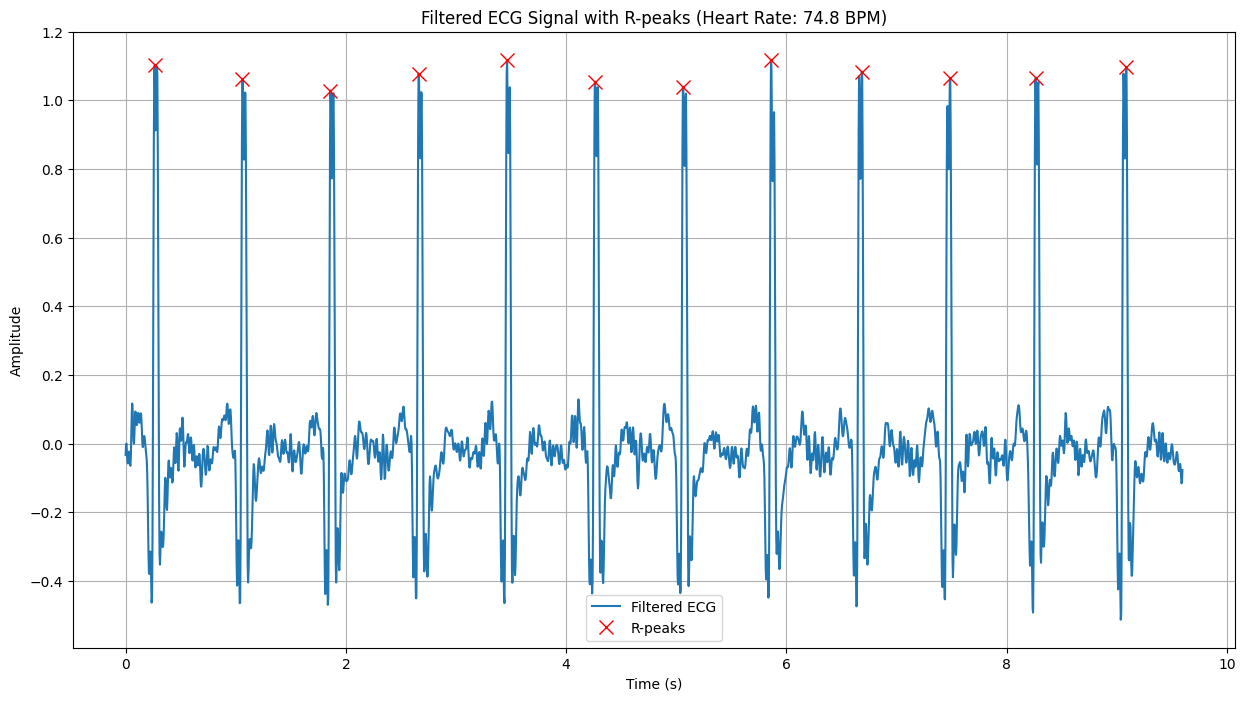

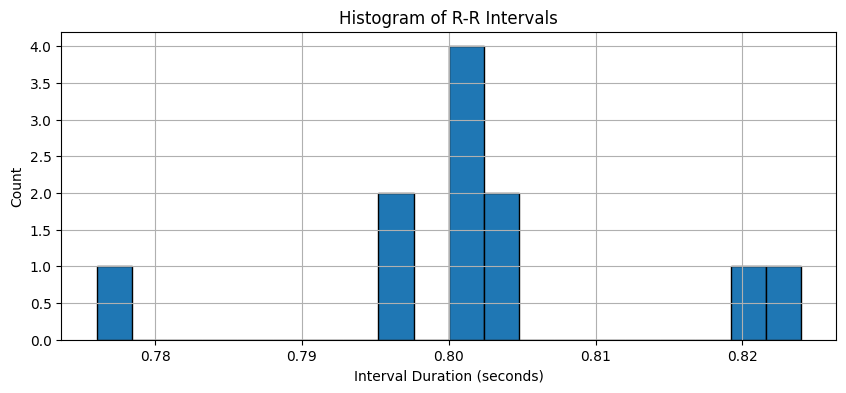

In [6]:
# Find R-peaks in the filtered signal
# Adjust height and distance parameters based on your signal characteristics
peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=100)  # minimum distance of 100 samples between peaks

# Calculate time points of the peaks
peak_times = peaks / sampling_rate

# Calculate intervals between peaks (in seconds)
intervals = np.diff(peak_times)

# Calculate heart rate
average_interval = np.mean(intervals)
heart_rate = 60 / average_interval

# Plot filtered signal with detected peaks
plt.figure(figsize=(15, 8))
plt.plot(time, filtered_ecg, label='Filtered ECG')
plt.plot(peak_times, filtered_ecg[peaks], "rx", label='R-peaks', markersize=10)
plt.title(f'Filtered ECG Signal with R-peaks (Heart Rate: {heart_rate:.1f} BPM)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Print detailed statistics
print(f"Number of R-peaks detected: {len(peaks)}")
print(f"Average heart rate: {heart_rate:.1f} BPM")
print(f"Average interval between beats: {average_interval:.3f} seconds")
print(f"Standard deviation of intervals: {np.std(intervals):.3f} seconds")

# Optional: Plot histogram of R-R intervals
plt.figure(figsize=(10, 4))
plt.hist(intervals, bins=20, edgecolor='black')
plt.title('Histogram of R-R Intervals')
plt.xlabel('Interval Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Findings: I found that overall, the filtered signal is much smoother and easier to analyze. The original signal had a lot of noise and baseline wander that made it difficult to identify the R-peaks. The bandpass filter helped to remove the high-frequency noise and the power line interference, which made it easier to detect the R-peaks. The heart rate calculation was more accurate after filtering, as the intervals between the peaks were more consistent. Additionally, with the histogram of distance of peaks, it makes it very easy to spot the frequency of the full data.